# Trabalho Final PDI

### Discente: Ruann Campos de Castro Farrapo

## Trabalho:
Realize a filtragem passa baixa , passa alta e passa faixa da imagem anexa no domínio da frequência.



Produza scripts em python que realize as operações de filtragem e apresente os resultados como figuras. Cada figura deve apresentar, para cada filtro, três resultados de filtragem (imagens filtradas) para três  frequências de corte distintas .


Utilize os filtros de sua preferência (veja os slides do tópico filtragem no domínio da frequência)

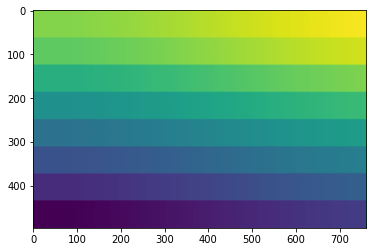

In [169]:
import math
import pylab
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('figura 1 (2).png', 0)
pylab.imshow(img);

## Filtragem Passa Baixa
np.fft.fft2: Esta função calcula a Transformada de Fourier discreta n-dimensional sobre quaisquer eixos em uma matriz M-dimensional por meio da Transformada Rápida de Fourier (FFT). Por padrão, a transformação é calculada sobre os dois últimos eixos da matriz de entrada, ou seja, uma FFT bidimensional.

In [170]:
import warnings 
warnings.simplefilter("ignore")

fourier = np.fft.fft2(img)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

## Filtro Ideal
#### É utilizado como base em todos os três cortes da filtragem passa baixa.

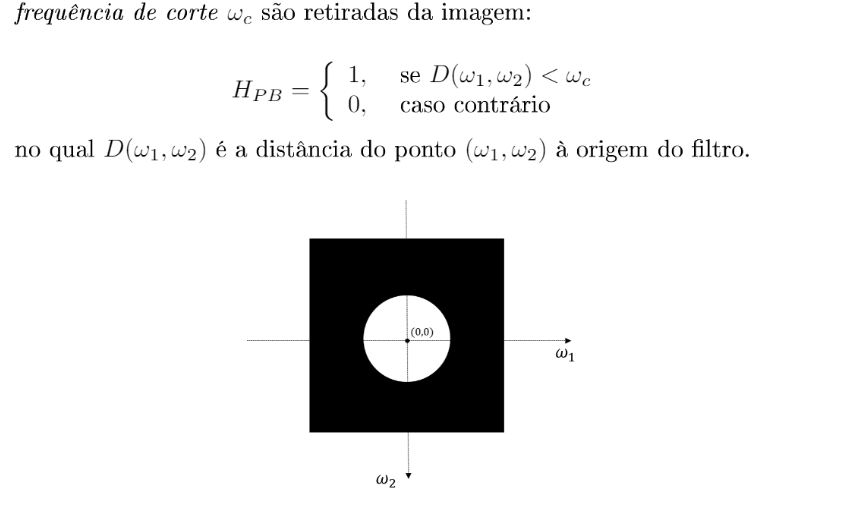

In [171]:
for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia do ponto a origem do filtro
        if dist <= wc_pixel:
            filt[i, j] = 1
        else:
            filt[i, j] = 0

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

## Corte 1: Imagem Geral Filtrada

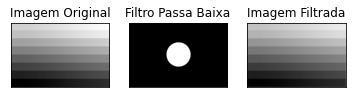

In [172]:
plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Baixa'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Corte 2: Imagem Cortada e Filtrada

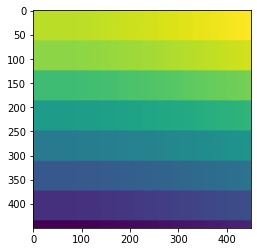

In [173]:
# Dimensões de corte estão abaixo, em x,y,h e w:
y=0
x=0
h=450
w=450
crop2 = img[y:y+h, x:x+w]
pylab.imshow(crop2);

In [174]:
import warnings 
warnings.simplefilter("ignore")

fourier = np.fft.fft2(crop2)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

In [175]:
for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia do ponto a origem do filtro
        if dist <= wc_pixel:
            filt[i, j] = 1
        else:
            filt[i, j] = 0

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

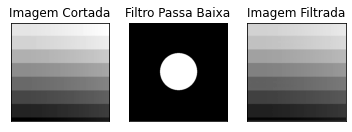

In [176]:
plt.subplot(131), plt.imshow(crop2, cmap='gray')
plt.title('Imagem Cortada'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Baixa'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Corte 3: Imagem Cortada e Filtrada

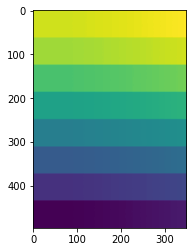

In [177]:
# Dimensões de corte estão abaixo, em x,y,h e w:
y=0
x=0
h=500
w=350
crop3 = img[y:y+h, x:x+w]
pylab.imshow(crop3);

In [178]:
import warnings 
warnings.simplefilter("ignore")

fourier = np.fft.fft2(crop3)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

In [179]:
for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia do ponto a origem do filtro
        if dist <= wc_pixel:
            filt[i, j] = 1
        else:
            filt[i, j] = 0

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

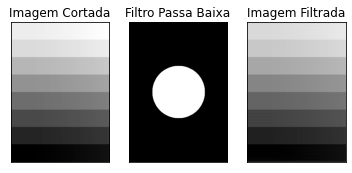

In [180]:
plt.subplot(131), plt.imshow(crop3, cmap='gray')
plt.title('Imagem Cortada'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Baixa'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Filtragem Passa Alta
np.fft.fft2: Esta função calcula a Transformada de Fourier discreta n-dimensional sobre quaisquer eixos em uma matriz M-dimensional por meio da Transformada Rápida de Fourier (FFT). Por padrão, a transformação é calculada sobre os dois últimos eixos da matriz de entrada, ou seja, uma FFT bidimensional.

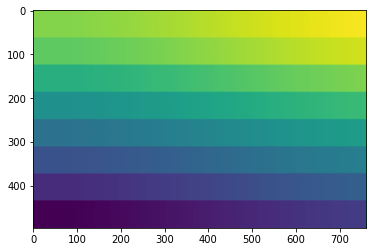

In [181]:
img4 = cv2.imread('figura 1 (2).png', 0)
pylab.imshow(img4);

In [182]:
fourier = np.fft.fft2(img4)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

### Filtro Butterworth Passa-Alta

In [183]:
n = 2

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia ao centro da imagem
        filt[i, j] = 1-(1/(1+(dist/wc_pixel)**(2*n)))  # Filtro Butterworth Passa-Alta

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

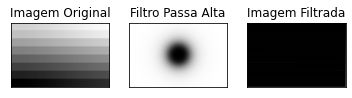

In [184]:
plt.subplot(131), plt.imshow(img4, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Alta'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Corte 2: Imagem Cortada e Filtrada

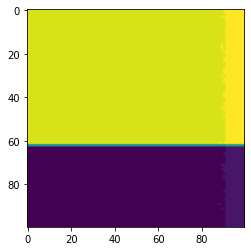

In [185]:
# Dimensões de corte estão abaixo, em x,y,h e w:
y=0
x=0
h=100
w=100
crop5 = img[y:y+h, x:x+w]
pylab.imshow(crop5);

In [186]:
fourier = np.fft.fft2(crop5)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

### Filtro Butterworth Passa-Alta

In [187]:
n = 2

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia ao centro da imagem
        filt[i, j] = 1-(1/(1+(dist/wc_pixel)**(2*n)))  # Filtro Butterworth Passa-Alta

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

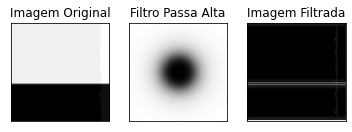

In [188]:
plt.subplot(131), plt.imshow(crop5, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Alta'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()

## Corte 3: Imagem Cortada e Filtrada

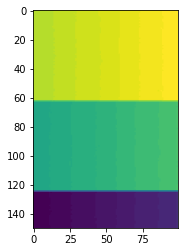

In [189]:
# Dimensões de corte estão abaixo, em x,y,h e w:
y=0
x=200
h=150
w=100
crop6 = img[y:y+h, x:x+w]
pylab.imshow(crop6);

In [190]:
fourier = np.fft.fft2(crop6)
fourier_shifted = np.fft.fftshift(fourier)

magnitude_spectrum = 20*np.log(np.abs(fourier_shifted))

h, w = fourier_shifted.shape[0:2]
filt = np.zeros((h, w))

# wc = math.pi/8
# wc = math.pi/4
wc = 3*math.pi/8

wc_pixel = wc*(1/math.pi)*(np.floor(h/2))  # idealmente h = w

### Filtro Butterworth Passa-Alta

In [191]:
n = 2

for i in range(h):
    for j in range(w):
        dist = ((i-(np.floor(h/2)))**2 + (j-(np.floor(w/2)))**2)**.5  # distancia ao centro da imagem
        filt[i, j] = 1-(1/(1+(dist/wc_pixel)**(2*n)))  # Filtro Butterworth Passa-Alta

result = np.multiply(fourier_shifted, filt)

result_non_shifted = np.fft.ifftshift(result)
filtered_img = np.fft.ifft2(result_non_shifted)
filtered_img = np.abs(filtered_img)

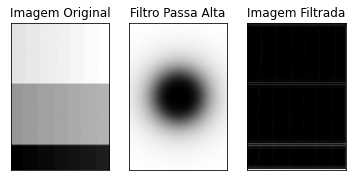

In [192]:
plt.subplot(131), plt.imshow(crop6, cmap='gray')
plt.title('Imagem Original'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(filt, cmap='gray')
plt.title('Filtro Passa Alta'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(filtered_img, cmap='gray')
plt.title('Imagem Filtrada'), plt.xticks([]), plt.yticks([])

plt.show()